<a href="https://colab.research.google.com/github/Xenosians/Tugas_Fuzz_Logic/blob/main/Fuzzy_Logic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

!gdown --id 1OqZPEN2m_igflKLzO7w4EFb9717b_jj9


In [ ]:
df = pd.read_excel('./Mahasiswa.xlsx.xls')
df.head()

In [ ]:
class mahasiswa:
  def __init__(self):
      self.Id = 0
      self.Penghasilan = 0
      self.Pengeluaran = 0

      self.Penghasilan_sedikit = -1
      self.Penghasilan_sedang = -1
      self.Penghasilan_banyak = -1

      self.Pengeluaran_sedikit = -1
      self.Pengeluaran_sedang = -1
      self.Pengeluaran_banyak = -1

      self.ditolak = []
      self.dipertimbangkan = []
      self.diterima = []

      self.ditolak_akhir = 0
      self.dipertimbangkan_akhir = 0
      self.diterima_akhir = 0

      self.nilai_akhir = 0

  def tampil(self):
      print('id mahasiswa = {} \n nilai penghasilan = {} \n nilai pengeluaran = {} , \n nilai akhir = {} , \n penghasilan_sedikit = {} , \n penghasilan_sedang = {} , \n penghasilan_banyak = {}, \n pengeluaran_sedikit = {} , \n pengeluaran_sedang = {} , \n pengeluaran_banyak = {} , \n persentase_ditolak = {}, \n persentase_dipertimbangkan = {} , \n persentase_diterima = {}'.format(self.Id,self.Penghasilan,self.Pengeluaran,self.nilai_akhir,self.Penghasilan_sedikit,self.Penghasilan_sedang,self.Penghasilan_banyak,self.Pengeluaran_sedikit,self.Pengeluaran_sedang,self.Pengeluaran_banyak,self.ditolak_akhir,self.dipertimbangkan_akhir,self.diterima_akhir))

mahasiswa_data = []

for i in range(len(df)):
    mahasiswa_temp = mahasiswa()
    mahasiswa_temp.Id= df.iloc[i][0]
    mahasiswa_temp.Penghasilan = df.iloc[i][1]
    mahasiswa_temp.Pengeluaran = df.iloc[i][2]
    mahasiswa_data.append(mahasiswa_temp)

    

In [ ]:
start = 0
a = 4
b = 9
c = 10
d = 15
max1 = 20
a2 = 2.0
b2 = 7.0
c2 = 6.0
d2 = 11.0
max2 = 12
def fuzzifikasi(mahasiswa_temp):
    for i in range(len(mahasiswa_temp)):
      if mahasiswa_temp[i].Penghasilan >= start and mahasiswa_temp[i].Penghasilan < a  :
        mahasiswa_temp[i].Penghasilan_sedikit = 1
      elif mahasiswa_temp[i].Penghasilan > a and mahasiswa_temp[i].Penghasilan < b :
        mahasiswa_temp[i].Penghasilan_sedikit = -(mahasiswa_temp[i].Penghasilan - b ) / (b - a)
        mahasiswa_temp[i].Penghasilan_sedang = (mahasiswa_temp[i].Penghasilan - a) / ( b - a )
      elif mahasiswa_temp[i].Penghasilan > b and mahasiswa_temp[i].Penghasilan < c  :
        mahasiswa_temp[i].Penghasilan_sedang = 1
      elif mahasiswa_temp[i].Penghasilan > c and mahasiswa_temp[i].Penghasilan < d  :
        mahasiswa_temp[i].Penghasilan_sedang = - (mahasiswa_temp[i].Penghasilan - d ) / ( d - c )
        mahasiswa_temp[i].Penghasilan_banyak =  (mahasiswa_temp[i].Penghasilan - c ) / ( d - c )
      elif mahasiswa_temp[i].Penghasilan > d and mahasiswa_temp[i].Penghasilan <= max1  :
        mahasiswa_temp[i].Penghasilan_banyak = 1
      
      if mahasiswa_temp[i].Pengeluaran >= start and mahasiswa_temp[i].Pengeluaran < a2 :
        mahasiswa_temp[i].Pengeluaran_sedikit = 1
      elif mahasiswa_temp[i].Pengeluaran > a2 and mahasiswa_temp[i].Pengeluaran < b2  :
        mahasiswa_temp[i].Pengeluaran_sedikit = -(mahasiswa_temp[i].Pengeluaran - b2 ) / (b2 - a2)
        mahasiswa_temp[i].Pengeluaran_sedang = (mahasiswa_temp[i].Pengeluaran - a2) / ( b2 - a2 )       
      elif mahasiswa_temp[i].Pengeluaran > b2 and mahasiswa_temp[i].Pengeluaran < c2  :
        mahasiswa_temp[i].Pengeluaran_sedang = 1
      elif mahasiswa_temp[i].Pengeluaran > c2 and mahasiswa_temp[i].Pengeluaran < d2  :
        mahasiswa_temp[i].Pengeluaran_sedang = - (mahasiswa_temp[i].Pengeluaran - d2 ) / ( d2 - c2 )
        mahasiswa_temp[i].Pengeluaran_banyak =  (mahasiswa_temp[i].Pengeluaran - c2 ) / ( d2 - c2 )
      elif mahasiswa_temp[i].Pengeluaran > d2 and mahasiswa_temp[i].Pengeluaran <= max2  :
        mahasiswa_temp[i].Pengeluaran_banyak = 1

    return mahasiswa_temp 
      

mahasiswa_data = fuzzifikasi(mahasiswa_data)

In [ ]:
def inferensi(mahasiswa_temp):

    for i in range (len(mahasiswa_temp)):
      if mahasiswa_temp[i].Penghasilan_sedikit != -1 :
        if mahasiswa_temp[i].Pengeluaran_sedikit != -1 :
          mahasiswa_temp[i].dipertimbangkan.append(min(mahasiswa_temp[i].Penghasilan_sedikit , mahasiswa_temp[i].Pengeluaran_sedikit))
        if mahasiswa_temp[i].Pengeluaran_sedang != -1 :
          mahasiswa_temp[i].diterima.append(min(mahasiswa_temp[i].Penghasilan_sedikit , mahasiswa_temp[i].Pengeluaran_sedang))
        if mahasiswa_temp[i].Pengeluaran_banyak != -1 :
          mahasiswa_temp[i].diterima.append(min(mahasiswa_temp[i].Penghasilan_sedikit , mahasiswa_temp[i].Pengeluaran_banyak))
      if mahasiswa_temp[i].Penghasilan_sedang != -1 :
        if mahasiswa_temp[i].Pengeluaran_sedikit != -1 :
          mahasiswa_temp[i].ditolak.append(min(mahasiswa_temp[i].Penghasilan_sedang , mahasiswa_temp[i].Pengeluaran_sedikit))
        if mahasiswa_temp[i].Pengeluaran_sedang != -1 :
          mahasiswa_temp[i].dipertimbangkan.append(min(mahasiswa_temp[i].Penghasilan_sedang , mahasiswa_temp[i].Pengeluaran_sedang))
        if mahasiswa_temp[i].Pengeluaran_banyak != -1 :
          mahasiswa_temp[i].diterima.append(min(mahasiswa_temp[i].Penghasilan_sedang , mahasiswa_temp[i].Pengeluaran_banyak))
      if mahasiswa_temp[i].Penghasilan_banyak != -1 :
        if mahasiswa_temp[i].Pengeluaran_sedikit != -1 :
          mahasiswa_temp[i].ditolak.append(min(mahasiswa_temp[i].Penghasilan_banyak , mahasiswa_temp[i].Pengeluaran_sedikit))
        if mahasiswa_temp[i].Pengeluaran_sedang != -1 :
          mahasiswa_temp[i].ditolak.append(min(mahasiswa_temp[i].Penghasilan_banyak , mahasiswa_temp[i].Pengeluaran_sedang))
        if mahasiswa_temp[i].Pengeluaran_banyak != -1 :
          mahasiswa_temp[i].dipertimbangkan.append(min(mahasiswa_temp[i].Penghasilan_banyak , mahasiswa_temp[i].Pengeluaran_banyak))
      
      if len(mahasiswa_temp[i].ditolak) != 0 :
        mahasiswa_temp[i].ditolak_akhir = max(mahasiswa_temp[i].ditolak)
      
      if len(mahasiswa_temp[i].dipertimbangkan) != 0 :
        mahasiswa_temp[i].dipertimbangkan_akhir = max(mahasiswa_temp[i].dipertimbangkan)

      if len(mahasiswa_temp[i].diterima) != 0 :
        mahasiswa_temp[i].diterima_akhir = max(mahasiswa_temp[i].diterima)

    return mahasiswa_temp      
      
mahasiswa_data = inferensi(mahasiswa_data)
for i in range(len(mahasiswa_data)):
  print(mahasiswa_data[i].tampil())

# Deffuzification

Menggunakan sugeno model untuk fungsi deffuzzifikasi dengan nilai seperti berikut

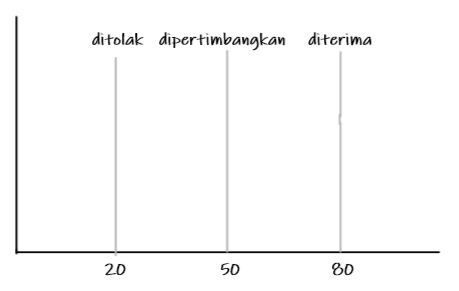

In [ ]:
def defuzzifikasi(mahasiswa_data):
  for i in range(len(mahasiswa_data)):
    mahasiswa_data[i].nilai_akhir = mahasiswa_data[i].ditolak_akhir * 20 + mahasiswa_data[i].dipertimbangkan_akhir * 50 + mahasiswa_data[i].diterima_akhir * 80
  
  return mahasiswa_data

mahasiswa_data = defuzzifikasi(mahasiswa_data) 
for i in range(len(mahasiswa_data)):
  print(mahasiswa_data[i].tampil())

In [ ]:
def Sorting(mahasiswa_temp : [mahasiswa()]):
  mahasiswa_temp = sorted(mahasiswa_temp , key=lambda y : y.nilai_akhir ,reverse = True)
  return mahasiswa_temp

mahasiswa_data = Sorting(mahasiswa_data)

final_data = []
for i in range(len(mahasiswa_data)):
  final_temp = []
  final_temp.append(mahasiswa_data[i].Id)
  final_temp.append(mahasiswa_data[i].Pengeluaran)
  final_temp.append(mahasiswa_data[i].Penghasilan)
  final_temp.append(mahasiswa_data[i].nilai_akhir)
  final_data.append(final_temp)
  

df_akhir = pd.DataFrame(final_data , columns= ["Id" , "Pengeluaran" , "Penghasilan" , "Nilai Akhir"])

print(df_akhir)
xs = df_akhir.Penghasilan
ys = df_akhir.Pengeluaran
plt.scatter(xs, ys, s=50, edgecolors="black")
